First 5 rows:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Shape: (541909, 8)

Data types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Cou

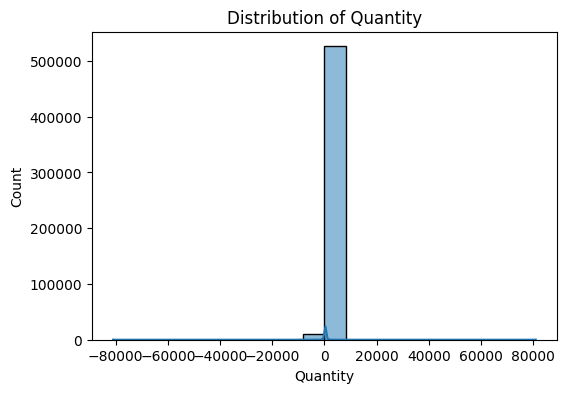

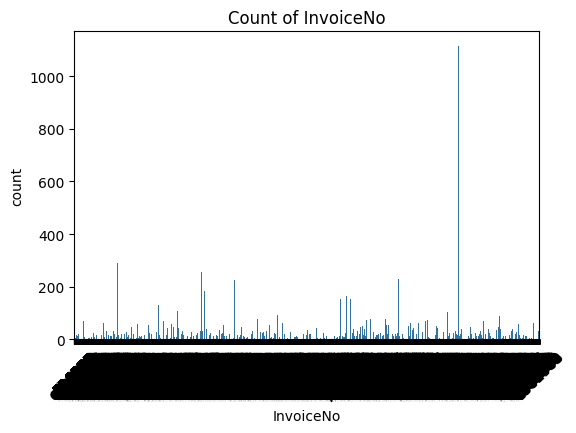

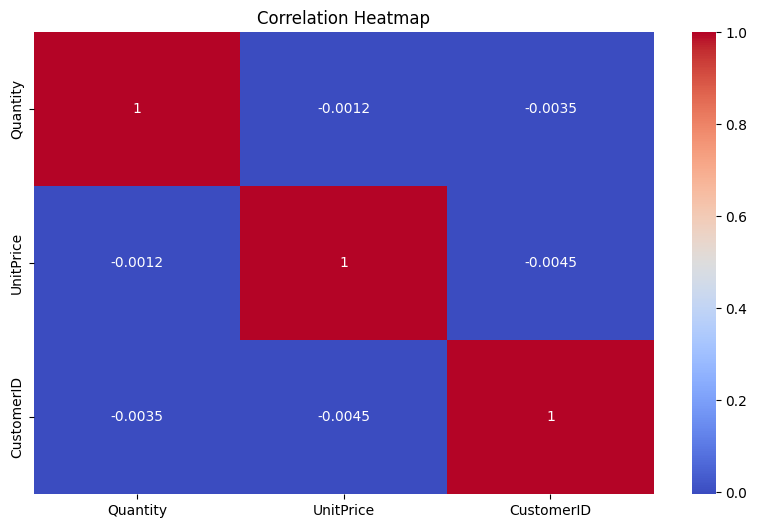


Cleaned dataset saved as cleaned_ecommerce_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:/Users/HP/Documents/dataScience/archive/data.csv", encoding='latin1')
print("First 5 rows:\n", df.head())
print("\nShape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe(include='all'))
print("\nMissing values:\n", df.isnull().sum())
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

duplicates = df.duplicated().sum()
print("\n--- NUMBER OF DUPLICATES ---", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
if num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[num_cols[0]], bins=20, kde=True)
    plt.title(f"Distribution of {num_cols[0]}")
    plt.show()
if cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat_cols[0], data=df)
    plt.title(f"Count of {cat_cols[0]}")
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:/Users/HP/Documents/dataScience/archive/data.csv", encoding='latin1')
print("Initial shape:", df.shape)
print("Missing values per column:\n", df.isnull().sum())
print("Columns:\n", df.columns)
df = df.drop_duplicates()
high_card_cols = ['InvoiceNo', 'StockCode', 'Description']  # adjust for your dataset
df = df.drop(columns=[col for col in high_card_cols if col in df.columns])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_hour'] = df[col].dt.hour
    df = df.drop(columns=[col])
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes
target_candidates = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
if target_candidates:
    target_col = target_candidates[0]
    print(f"Auto-detected target column: {target_col}")
else:
    target_col = 'CustomerID'  # fallback
    print(f"No 0/1 target found. Using fallback: {target_col}")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols:
    num_cols.remove(target_col)
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    if std > 0:
        df[col] = (df[col] - mean) / std
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle
X = df.drop(columns=[target_col])
y = df[target_col]
train_size = int(0.8 * len(df))
X_train = X.iloc[:train_size, :].reset_index(drop=True)
X_test = X.iloc[train_size:, :].reset_index(drop=True)
y_train = y.iloc[:train_size].reset_index(drop=True)
y_test = y.iloc[train_size:].reset_index(drop=True)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())
X_train.to_csv("X_train_processed.csv", index=False)
X_test.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train_processed.csv", index=False)
y_test.to_csv("y_test_processed.csv", index=False)
print("Preprocessing completed successfully. Processed files saved.")


Initial shape: (541909, 8)
Missing values per column:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Columns:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
No 0/1 target found. Using fallback: CustomerID
X_train shape: (429312, 7)
X_test shape: (107329, 7)
y_train distribution:
 CustomerID
15145.0    108197
17841.0      6264
14911.0      4697
14096.0      4064
12748.0      3531
            ...  
17291.0         1
15369.0         1
16765.0         1
15488.0         1
15195.0         1
Name: count, Length: 4351, dtype: int64
y_test distribution:
 CustomerID
15145.0    26907
17841.0     1548
14911.0     1201
14096.0     1064
12748.0      928
           ...  
16692.0        1
12943.0        1
14213.0        1
14148.0        1
12581.0        1
Name: coun